In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
import math
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [46]:
df = pd.read_csv("data/data_hour_v2.csv")

In [47]:
df2 = pd.read_csv("data/data_with_month.csv")

In [48]:
df['month'] = df2['month']
df

,Unnamed: 0,timestamp,Office_Marla,hour,month
0,0,2014-06-02 00:00:00,10.50,1,6
1,1,2014-06-02 01:00:00,8.25,1,6
2,2,2014-06-02 02:00:00,9.00,1,6
3,3,2014-06-02 03:00:00,9.00,1,6
4,4,2014-06-02 04:00:00,9.25,1,6
5,5,2014-06-02 05:00:00,10.25,1,6
6,6,2014-06-02 06:00:00,9.00,1,6
7,7,2014-06-02 07:00:00,12.00,3,6
8,8,2014-06-02 08:00:00,10.50,3,6
9,9,2014-06-02 09:00:00,9.50,3,6


In [49]:
# for i in range(len(df)):
# #   峰段
#     if df['timestamp'][i].hour >= 7 and df['timestamp'][i].hour <= 11:
#         df['hour'][i] = 3
#     if df['timestamp'][i].hour >= 19 and df['timestamp'][i].hour <= 23:
#         df['hour'][i] = 3
# #   谷段
#     if df['timestamp'][i].hour < 7 or df['timestamp'][i].hour > 23:
#         df['hour'][i] = 1
# #   平段
#     if df['timestamp'][i].hour > 11 and df['timestamp'][i].hour < 19:
#         df['hour'][i] = 2

In [50]:
# df.to_csv("C:\\Users\\Administrator\\Desktop\\大三上课程\\深度学习技术\\homeWork\\data_hour_v2.csv")

In [51]:
dataset = df[['Office_Marla']].values
dataset

array([[10.5 ],
       [ 8.25],
       [ 9.  ],
       ...,
       [10.75],
       [10.25],
       [10.5 ]])

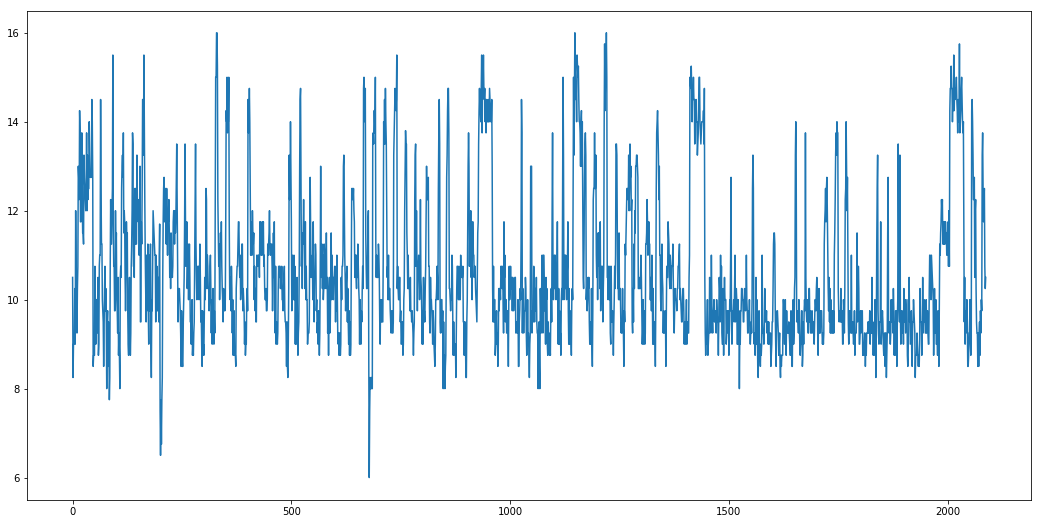

In [52]:
plt.figure(figsize=(18, 9))
plt.plot(dataset)
plt.show()

In [53]:
#归一化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [54]:
hour = np.array(df['hour'])
hour = np.expand_dims(hour, axis=1)
scalerH = MinMaxScaler(feature_range=(0, 1))
hour = scalerH.fit_transform(hour)
hour

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [55]:
month = np.array(df['month'])
month = np.expand_dims(month, axis=1)
scalerH = MinMaxScaler(feature_range=(0, 1))
month = scalerH.fit_transform(month)
month

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [56]:
dataset = np.hstack((dataset,hour,month))

train_size = int(len(dataset) * 0.7)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

In [57]:
def create_dataset(dataset, look_back, out_num):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back - out_num + 1):
        a = dataset[i:(i+look_back)]
        b = dataset[:,0][(i+look_back):(i+look_back+out_num)]
        dataX.append(a)
        dataY.append(b)
    return np.array(dataX),np.array(dataY)

In [58]:
# 用前3个预测后3个
look_back = 3
out_num = 3
trainX,trainY  = create_dataset(trainlist,look_back, out_num)
testX,testY = create_dataset(testlist,look_back, out_num)

In [59]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 3))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1] ,3))

In [60]:
n_steps_in, n_steps_out = look_back, out_num
# 此例中 n features = 2，因为输入有2个并行序列  
n_features = 3

# define model
model = Sequential()
model.add(LSTM(10, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(10, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.fit(trainX, trainY, epochs=2000, batch_size=100, verbose=2)

Epoch 1/2000
15/15 - 0s - loss: 0.2558
Epoch 2/2000
15/15 - 0s - loss: 0.2332
Epoch 3/2000
15/15 - 0s - loss: 0.2092
Epoch 4/2000
15/15 - 0s - loss: 0.1813
Epoch 5/2000
15/15 - 0s - loss: 0.1479
Epoch 6/2000
15/15 - 0s - loss: 0.1087
Epoch 7/2000
15/15 - 0s - loss: 0.0736
Epoch 8/2000
15/15 - 0s - loss: 0.0507
Epoch 9/2000
15/15 - 0s - loss: 0.0375
Epoch 10/2000
15/15 - 0s - loss: 0.0301
Epoch 11/2000
15/15 - 0s - loss: 0.0256
Epoch 12/2000
15/15 - 0s - loss: 0.0231
Epoch 13/2000
15/15 - 0s - loss: 0.0217
Epoch 14/2000
15/15 - 0s - loss: 0.0211
Epoch 15/2000
15/15 - 0s - loss: 0.0208
Epoch 16/2000
15/15 - 0s - loss: 0.0206
Epoch 17/2000
15/15 - 0s - loss: 0.0204
Epoch 18/2000
15/15 - 0s - loss: 0.0203
Epoch 19/2000
15/15 - 0s - loss: 0.0203
Epoch 20/2000
15/15 - 0s - loss: 0.0201
Epoch 21/2000
15/15 - 0s - loss: 0.0200
Epoch 22/2000
15/15 - 0s - loss: 0.0200
Epoch 23/2000
15/15 - 0s - loss: 0.0198
Epoch 24/2000
15/15 - 0s - loss: 0.0197
Epoch 25/2000
15/15 - 0s - loss: 0.0196
Epoch 26/

Epoch 204/2000
15/15 - 0s - loss: 0.0118
Epoch 205/2000
15/15 - 0s - loss: 0.0117
Epoch 206/2000
15/15 - 0s - loss: 0.0117
Epoch 207/2000
15/15 - 0s - loss: 0.0117
Epoch 208/2000
15/15 - 0s - loss: 0.0117
Epoch 209/2000
15/15 - 0s - loss: 0.0117
Epoch 210/2000
15/15 - 0s - loss: 0.0117
Epoch 211/2000
15/15 - 0s - loss: 0.0117
Epoch 212/2000
15/15 - 0s - loss: 0.0118
Epoch 213/2000
15/15 - 0s - loss: 0.0117
Epoch 214/2000
15/15 - 0s - loss: 0.0121
Epoch 215/2000
15/15 - 0s - loss: 0.0118
Epoch 216/2000
15/15 - 0s - loss: 0.0117
Epoch 217/2000
15/15 - 0s - loss: 0.0117
Epoch 218/2000
15/15 - 0s - loss: 0.0116
Epoch 219/2000
15/15 - 0s - loss: 0.0117
Epoch 220/2000
15/15 - 0s - loss: 0.0117
Epoch 221/2000
15/15 - 0s - loss: 0.0117
Epoch 222/2000
15/15 - 0s - loss: 0.0118
Epoch 223/2000
15/15 - 0s - loss: 0.0117
Epoch 224/2000
15/15 - 0s - loss: 0.0117
Epoch 225/2000
15/15 - 0s - loss: 0.0117
Epoch 226/2000
15/15 - 0s - loss: 0.0117
Epoch 227/2000
15/15 - 0s - loss: 0.0116
Epoch 228/2000
1

Epoch 404/2000
15/15 - 0s - loss: 0.0115
Epoch 405/2000
15/15 - 0s - loss: 0.0116
Epoch 406/2000
15/15 - 0s - loss: 0.0114
Epoch 407/2000
15/15 - 0s - loss: 0.0115
Epoch 408/2000
15/15 - 0s - loss: 0.0115
Epoch 409/2000
15/15 - 0s - loss: 0.0114
Epoch 410/2000
15/15 - 0s - loss: 0.0114
Epoch 411/2000
15/15 - 0s - loss: 0.0114
Epoch 412/2000
15/15 - 0s - loss: 0.0115
Epoch 413/2000
15/15 - 0s - loss: 0.0115
Epoch 414/2000
15/15 - 0s - loss: 0.0115
Epoch 415/2000
15/15 - 0s - loss: 0.0115
Epoch 416/2000
15/15 - 0s - loss: 0.0114
Epoch 417/2000
15/15 - 0s - loss: 0.0114
Epoch 418/2000
15/15 - 0s - loss: 0.0114
Epoch 419/2000
15/15 - 0s - loss: 0.0114
Epoch 420/2000
15/15 - 0s - loss: 0.0115
Epoch 421/2000
15/15 - 0s - loss: 0.0114
Epoch 422/2000
15/15 - 0s - loss: 0.0114
Epoch 423/2000
15/15 - 0s - loss: 0.0116
Epoch 424/2000
15/15 - 0s - loss: 0.0117
Epoch 425/2000
15/15 - 0s - loss: 0.0114
Epoch 426/2000
15/15 - 0s - loss: 0.0114
Epoch 427/2000
15/15 - 0s - loss: 0.0114
Epoch 428/2000
1

Epoch 604/2000
15/15 - 0s - loss: 0.0114
Epoch 605/2000
15/15 - 0s - loss: 0.0112
Epoch 606/2000
15/15 - 0s - loss: 0.0113
Epoch 607/2000
15/15 - 0s - loss: 0.0113
Epoch 608/2000
15/15 - 0s - loss: 0.0113
Epoch 609/2000
15/15 - 0s - loss: 0.0113
Epoch 610/2000
15/15 - 0s - loss: 0.0112
Epoch 611/2000
15/15 - 0s - loss: 0.0113
Epoch 612/2000
15/15 - 0s - loss: 0.0113
Epoch 613/2000
15/15 - 0s - loss: 0.0113
Epoch 614/2000
15/15 - 0s - loss: 0.0113
Epoch 615/2000
15/15 - 0s - loss: 0.0114
Epoch 616/2000
15/15 - 0s - loss: 0.0113
Epoch 617/2000
15/15 - 0s - loss: 0.0113
Epoch 618/2000
15/15 - 0s - loss: 0.0113
Epoch 619/2000
15/15 - 0s - loss: 0.0114
Epoch 620/2000
15/15 - 0s - loss: 0.0113
Epoch 621/2000
15/15 - 0s - loss: 0.0112
Epoch 622/2000
15/15 - 0s - loss: 0.0113
Epoch 623/2000
15/15 - 0s - loss: 0.0113
Epoch 624/2000
15/15 - 0s - loss: 0.0113
Epoch 625/2000
15/15 - 0s - loss: 0.0113
Epoch 626/2000
15/15 - 0s - loss: 0.0113
Epoch 627/2000
15/15 - 0s - loss: 0.0112
Epoch 628/2000
1

Epoch 804/2000
15/15 - 0s - loss: 0.0112
Epoch 805/2000
15/15 - 0s - loss: 0.0112
Epoch 806/2000
15/15 - 0s - loss: 0.0112
Epoch 807/2000
15/15 - 0s - loss: 0.0112
Epoch 808/2000
15/15 - 0s - loss: 0.0112
Epoch 809/2000
15/15 - 0s - loss: 0.0113
Epoch 810/2000
15/15 - 0s - loss: 0.0112
Epoch 811/2000
15/15 - 0s - loss: 0.0112
Epoch 812/2000
15/15 - 0s - loss: 0.0112
Epoch 813/2000
15/15 - 0s - loss: 0.0111
Epoch 814/2000
15/15 - 0s - loss: 0.0112
Epoch 815/2000
15/15 - 0s - loss: 0.0113
Epoch 816/2000
15/15 - 0s - loss: 0.0113
Epoch 817/2000
15/15 - 0s - loss: 0.0113
Epoch 818/2000
15/15 - 0s - loss: 0.0112
Epoch 819/2000
15/15 - 0s - loss: 0.0112
Epoch 820/2000
15/15 - 0s - loss: 0.0112
Epoch 821/2000
15/15 - 0s - loss: 0.0111
Epoch 822/2000
15/15 - 0s - loss: 0.0112
Epoch 823/2000
15/15 - 0s - loss: 0.0114
Epoch 824/2000
15/15 - 0s - loss: 0.0113
Epoch 825/2000
15/15 - 0s - loss: 0.0113
Epoch 826/2000
15/15 - 0s - loss: 0.0114
Epoch 827/2000
15/15 - 0s - loss: 0.0116
Epoch 828/2000
1

Epoch 1004/2000
15/15 - 0s - loss: 0.0112
Epoch 1005/2000
15/15 - 0s - loss: 0.0111
Epoch 1006/2000
15/15 - 0s - loss: 0.0111
Epoch 1007/2000
15/15 - 0s - loss: 0.0111
Epoch 1008/2000
15/15 - 0s - loss: 0.0111
Epoch 1009/2000
15/15 - 0s - loss: 0.0113
Epoch 1010/2000
15/15 - 0s - loss: 0.0112
Epoch 1011/2000
15/15 - 0s - loss: 0.0113
Epoch 1012/2000
15/15 - 0s - loss: 0.0111
Epoch 1013/2000
15/15 - 0s - loss: 0.0111
Epoch 1014/2000
15/15 - 0s - loss: 0.0111
Epoch 1015/2000
15/15 - 0s - loss: 0.0111
Epoch 1016/2000
15/15 - 0s - loss: 0.0111
Epoch 1017/2000
15/15 - 0s - loss: 0.0111
Epoch 1018/2000
15/15 - 0s - loss: 0.0111
Epoch 1019/2000
15/15 - 0s - loss: 0.0112
Epoch 1020/2000
15/15 - 0s - loss: 0.0111
Epoch 1021/2000
15/15 - 0s - loss: 0.0112
Epoch 1022/2000
15/15 - 0s - loss: 0.0112
Epoch 1023/2000
15/15 - 0s - loss: 0.0112
Epoch 1024/2000
15/15 - 0s - loss: 0.0112
Epoch 1025/2000
15/15 - 0s - loss: 0.0111
Epoch 1026/2000
15/15 - 0s - loss: 0.0111
Epoch 1027/2000
15/15 - 0s - loss:

15/15 - 0s - loss: 0.0110
Epoch 1200/2000
15/15 - 0s - loss: 0.0110
Epoch 1201/2000
15/15 - 0s - loss: 0.0110
Epoch 1202/2000
15/15 - 0s - loss: 0.0112
Epoch 1203/2000
15/15 - 0s - loss: 0.0111
Epoch 1204/2000
15/15 - 0s - loss: 0.0110
Epoch 1205/2000
15/15 - 0s - loss: 0.0112
Epoch 1206/2000
15/15 - 0s - loss: 0.0112
Epoch 1207/2000
15/15 - 0s - loss: 0.0111
Epoch 1208/2000
15/15 - 0s - loss: 0.0110
Epoch 1209/2000
15/15 - 0s - loss: 0.0110
Epoch 1210/2000
15/15 - 0s - loss: 0.0110
Epoch 1211/2000
15/15 - 0s - loss: 0.0110
Epoch 1212/2000
15/15 - 0s - loss: 0.0111
Epoch 1213/2000
15/15 - 0s - loss: 0.0110
Epoch 1214/2000
15/15 - 0s - loss: 0.0110
Epoch 1215/2000
15/15 - 0s - loss: 0.0110
Epoch 1216/2000
15/15 - 0s - loss: 0.0110
Epoch 1217/2000
15/15 - 0s - loss: 0.0111
Epoch 1218/2000
15/15 - 0s - loss: 0.0110
Epoch 1219/2000
15/15 - 0s - loss: 0.0111
Epoch 1220/2000
15/15 - 0s - loss: 0.0110
Epoch 1221/2000
15/15 - 0s - loss: 0.0111
Epoch 1222/2000
15/15 - 0s - loss: 0.0110
Epoch 12

Epoch 1395/2000
15/15 - 0s - loss: 0.0110
Epoch 1396/2000
15/15 - 0s - loss: 0.0111
Epoch 1397/2000
15/15 - 0s - loss: 0.0110
Epoch 1398/2000
15/15 - 0s - loss: 0.0109
Epoch 1399/2000
15/15 - 0s - loss: 0.0110
Epoch 1400/2000
15/15 - 0s - loss: 0.0110
Epoch 1401/2000
15/15 - 0s - loss: 0.0110
Epoch 1402/2000
15/15 - 0s - loss: 0.0109
Epoch 1403/2000
15/15 - 0s - loss: 0.0110
Epoch 1404/2000
15/15 - 0s - loss: 0.0110
Epoch 1405/2000
15/15 - 0s - loss: 0.0110
Epoch 1406/2000
15/15 - 0s - loss: 0.0109
Epoch 1407/2000
15/15 - 0s - loss: 0.0110
Epoch 1408/2000
15/15 - 0s - loss: 0.0110
Epoch 1409/2000
15/15 - 0s - loss: 0.0109
Epoch 1410/2000
15/15 - 0s - loss: 0.0109
Epoch 1411/2000
15/15 - 0s - loss: 0.0110
Epoch 1412/2000
15/15 - 0s - loss: 0.0110
Epoch 1413/2000
15/15 - 0s - loss: 0.0110
Epoch 1414/2000
15/15 - 0s - loss: 0.0110
Epoch 1415/2000
15/15 - 0s - loss: 0.0110
Epoch 1416/2000
15/15 - 0s - loss: 0.0110
Epoch 1417/2000
15/15 - 0s - loss: 0.0109
Epoch 1418/2000
15/15 - 0s - loss:

15/15 - 0s - loss: 0.0111
Epoch 1591/2000
15/15 - 0s - loss: 0.0110
Epoch 1592/2000
15/15 - 0s - loss: 0.0109
Epoch 1593/2000
15/15 - 0s - loss: 0.0109
Epoch 1594/2000
15/15 - 0s - loss: 0.0109
Epoch 1595/2000
15/15 - 0s - loss: 0.0110
Epoch 1596/2000
15/15 - 0s - loss: 0.0110
Epoch 1597/2000
15/15 - 0s - loss: 0.0109
Epoch 1598/2000
15/15 - 0s - loss: 0.0110
Epoch 1599/2000
15/15 - 0s - loss: 0.0110
Epoch 1600/2000
15/15 - 0s - loss: 0.0110
Epoch 1601/2000
15/15 - 0s - loss: 0.0110
Epoch 1602/2000
15/15 - 0s - loss: 0.0108
Epoch 1603/2000
15/15 - 0s - loss: 0.0108
Epoch 1604/2000
15/15 - 0s - loss: 0.0109
Epoch 1605/2000
15/15 - 0s - loss: 0.0108
Epoch 1606/2000
15/15 - 0s - loss: 0.0109
Epoch 1607/2000
15/15 - 0s - loss: 0.0111
Epoch 1608/2000
15/15 - 0s - loss: 0.0110
Epoch 1609/2000
15/15 - 0s - loss: 0.0108
Epoch 1610/2000
15/15 - 0s - loss: 0.0109
Epoch 1611/2000
15/15 - 0s - loss: 0.0109
Epoch 1612/2000
15/15 - 0s - loss: 0.0109
Epoch 1613/2000
15/15 - 0s - loss: 0.0109
Epoch 16

Epoch 1786/2000
15/15 - 0s - loss: 0.0109
Epoch 1787/2000
15/15 - 0s - loss: 0.0109
Epoch 1788/2000
15/15 - 0s - loss: 0.0108
Epoch 1789/2000
15/15 - 0s - loss: 0.0109
Epoch 1790/2000
15/15 - 0s - loss: 0.0108
Epoch 1791/2000
15/15 - 0s - loss: 0.0108
Epoch 1792/2000
15/15 - 0s - loss: 0.0108
Epoch 1793/2000
15/15 - 0s - loss: 0.0108
Epoch 1794/2000
15/15 - 0s - loss: 0.0108
Epoch 1795/2000
15/15 - 0s - loss: 0.0108
Epoch 1796/2000
15/15 - 0s - loss: 0.0108
Epoch 1797/2000
15/15 - 0s - loss: 0.0108
Epoch 1798/2000
15/15 - 0s - loss: 0.0110
Epoch 1799/2000
15/15 - 0s - loss: 0.0108
Epoch 1800/2000
15/15 - 0s - loss: 0.0109
Epoch 1801/2000
15/15 - 0s - loss: 0.0109
Epoch 1802/2000
15/15 - 0s - loss: 0.0110
Epoch 1803/2000
15/15 - 0s - loss: 0.0108
Epoch 1804/2000
15/15 - 0s - loss: 0.0108
Epoch 1805/2000
15/15 - 0s - loss: 0.0108
Epoch 1806/2000
15/15 - 0s - loss: 0.0108
Epoch 1807/2000
15/15 - 0s - loss: 0.0108
Epoch 1808/2000
15/15 - 0s - loss: 0.0108
Epoch 1809/2000
15/15 - 0s - loss:

15/15 - 0s - loss: 0.0108
Epoch 1982/2000
15/15 - 0s - loss: 0.0107
Epoch 1983/2000
15/15 - 0s - loss: 0.0107
Epoch 1984/2000
15/15 - 0s - loss: 0.0107
Epoch 1985/2000
15/15 - 0s - loss: 0.0108
Epoch 1986/2000
15/15 - 0s - loss: 0.0107
Epoch 1987/2000
15/15 - 0s - loss: 0.0108
Epoch 1988/2000
15/15 - 0s - loss: 0.0108
Epoch 1989/2000
15/15 - 0s - loss: 0.0108
Epoch 1990/2000
15/15 - 0s - loss: 0.0107
Epoch 1991/2000
15/15 - 0s - loss: 0.0107
Epoch 1992/2000
15/15 - 0s - loss: 0.0107
Epoch 1993/2000
15/15 - 0s - loss: 0.0109
Epoch 1994/2000
15/15 - 0s - loss: 0.0107
Epoch 1995/2000
15/15 - 0s - loss: 0.0107
Epoch 1996/2000
15/15 - 0s - loss: 0.0107
Epoch 1997/2000
15/15 - 0s - loss: 0.0108
Epoch 1998/2000
15/15 - 0s - loss: 0.0108
Epoch 1999/2000
15/15 - 0s - loss: 0.0107
Epoch 2000/2000
15/15 - 0s - loss: 0.0108


In [38]:
# model.save("C:\\Users\\Administrator\\Desktop\\大三上课程\\深度学习技术\\homeWork\\lstm_hour_2.h5")

In [39]:
# model = load_model("model/lstm_hour_2.h5")

In [61]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [62]:
#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY.reshape(trainY.shape[0], trainY.shape[1]))
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(testY.shape[0], testY.shape[1]))

In [63]:
def convert(a):
    a1 = np.array([a[:, 0][0]])
    a2 = np.array([(a[:, 0][1] + a[:, 1][0]) / 2])
    a3 = (a[:, 0][2: ] + a[:, 1][1: -1] + a[:, 2][0: -2]) / 3
    a4 = np.array([(a[:, 1][-1] + a[:, 2][-2]) / 2])
    a5 = np.array([a[:, 2][-1]])
    a_last = np.concatenate([a1,a2,a3,a4,a5])
    return a_last

In [64]:
trainPredict = convert(trainPredict)
testPredict = convert(testPredict)
trainY = convert(trainY)
testY = convert(testY)

In [65]:
predict = np.append(trainPredict, testPredict)
y = np.append(trainY, testY)

In [66]:
# 求均方误差(1)  所有一起
trainScore = math.sqrt(mean_squared_error(trainY.flatten(), trainPredict.flatten()))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY.flatten(), testPredict.flatten()))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.955 RMSE
Test Score: 0.999 RMSE


In [67]:
trainScore1 = mean_squared_error(trainY.flatten(), trainPredict.flatten())
print('Train Score: %.3f MSE' % (trainScore1))
testScore1 = mean_squared_error(testY.flatten(), testPredict.flatten())
print('Test Score: %.3f MSE' % (testScore1))

Train Score: 0.912 MSE
Test Score: 0.999 MSE


In [68]:
# 求均方误差(2)  使用最终的均值结果
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.955 RMSE
Test Score: 0.999 RMSE


## 所有数据

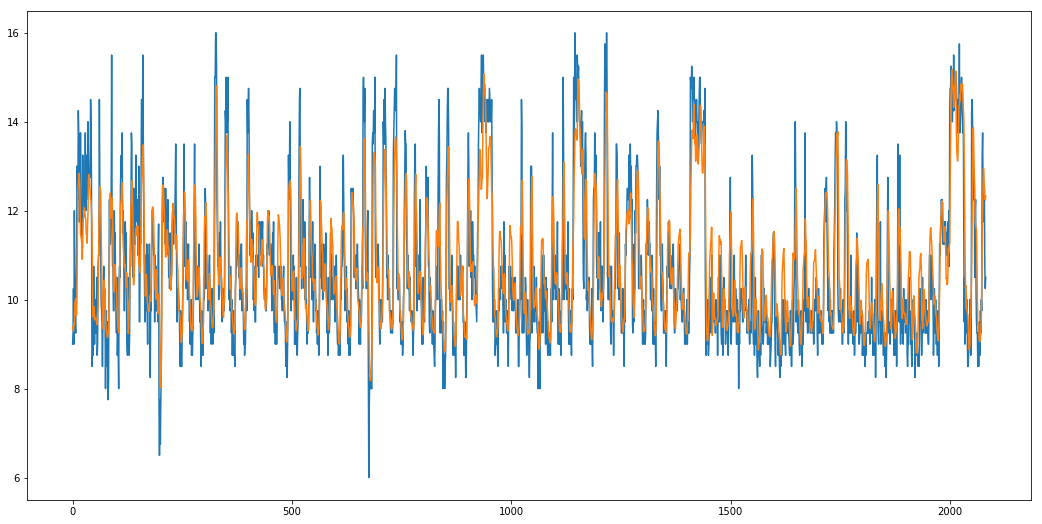

In [69]:
plt.figure(figsize=(18, 9))
plt.plot(y)
plt.plot(predict)
plt.show()

## 训练集

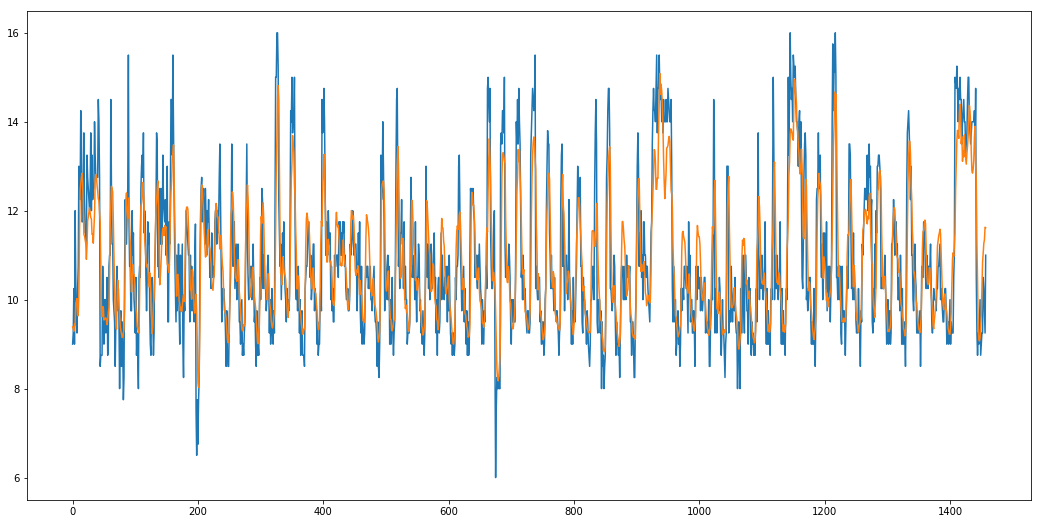

In [70]:
plt.figure(figsize=(18, 9))
plt.plot(trainY)
plt.plot(trainPredict)
plt.show()

## 测试集

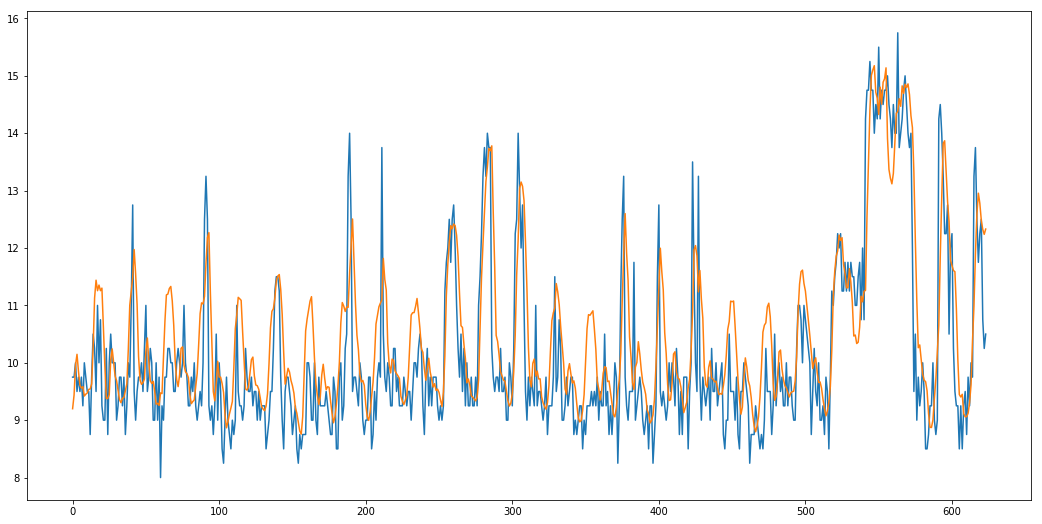

In [71]:
plt.figure(figsize=(18, 9))
plt.plot(testY)
plt.plot(testPredict)
plt.show()

## 前200条数据 （训练集）

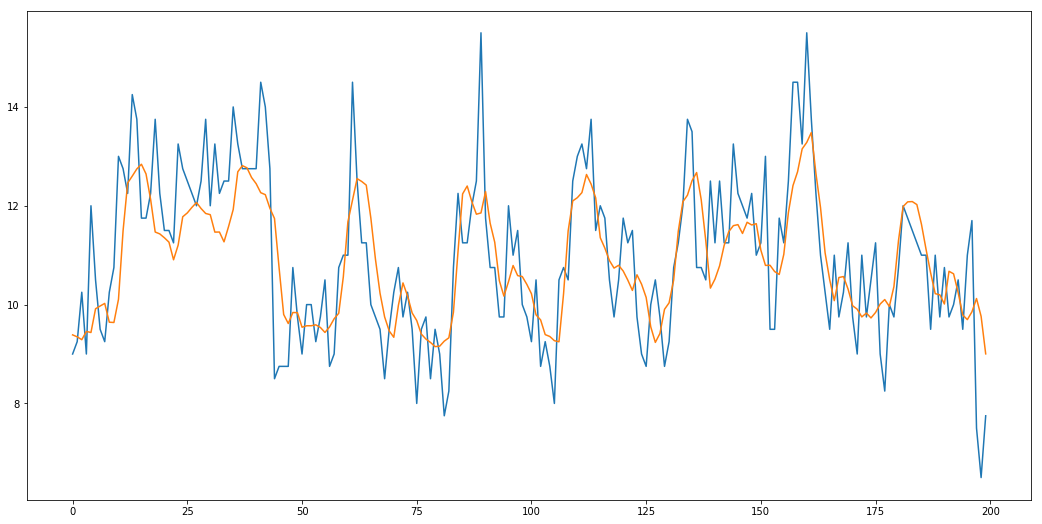

In [72]:
plt.figure(figsize=(18, 9))
plt.plot(y[:200])
plt.plot(predict[:200])
plt.show()

## 后200条数据 （测试集）

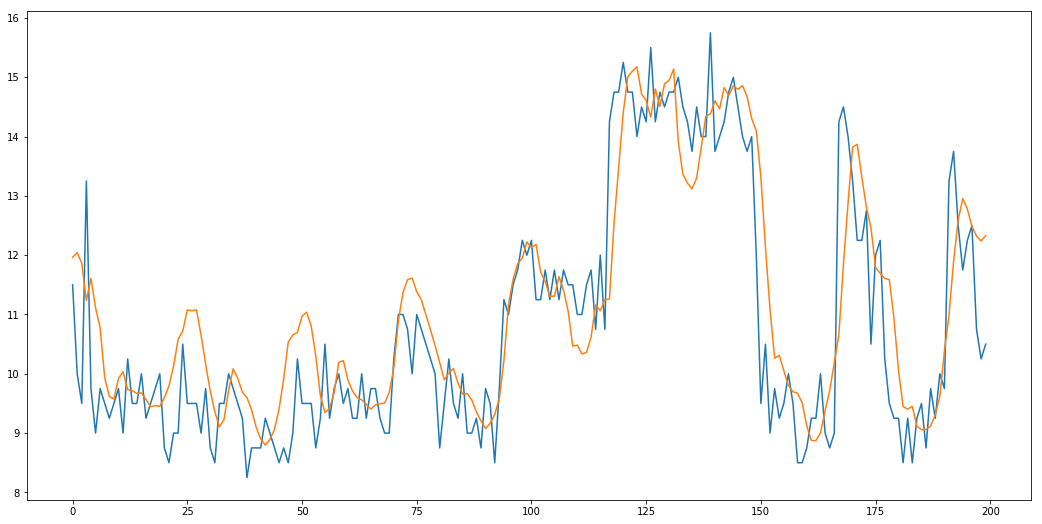

In [73]:
plt.figure(figsize=(18, 9))
plt.plot(y[-200:])
plt.plot(predict[-200:])
plt.show()

## 总体结果 

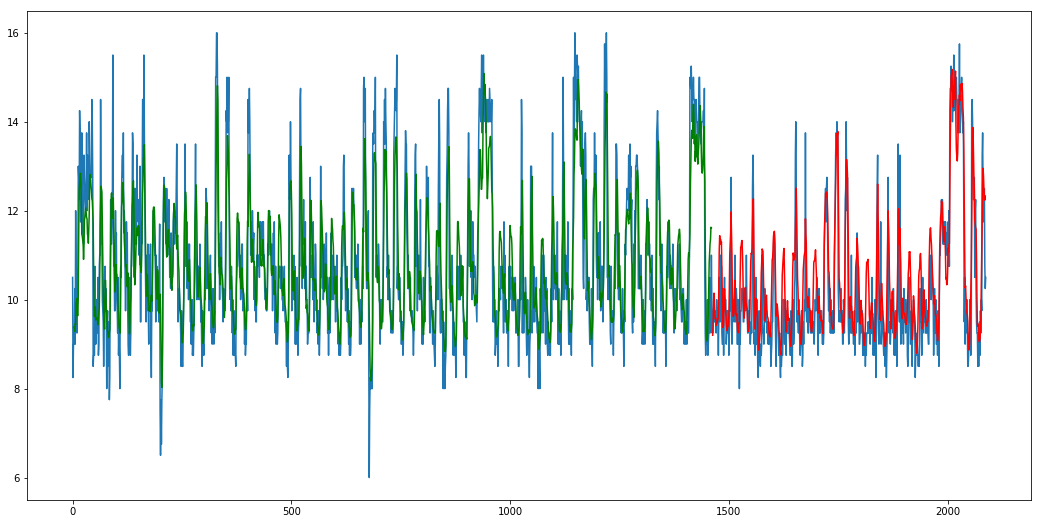

In [74]:
plt.figure(figsize=(18, 9))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset[:,0])
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset[:,0])
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)-1:len(dataset)-1] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)[:,0])
plt.plot(trainPredictPlot,'g')
plt.plot(testPredictPlot,'r')
plt.show()